# Лабораторная работа 1
# Вариант 2
## Афиркина Марина Андреевна
## 17 АСв

## Отмена рейсов

1. Подсчитайте количество отменённых рейсов.
2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.
4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
8. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

### Импорт

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
df_flights=pd.read_csv('flights.csv')

C:\Uni\3 курс\MachLearn\WinPython\WPy64-3760\python-3.7.6.amd64\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Подсчитайте количество отменённых рейсов.

In [2]:
df_flights[df_flights.CANCELLED==1].shape[0]

89884

## 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [3]:
data_flights2=df_flights.groupby('ORIGIN_AIRPORT')['CANCELLED'].count().sort_values(ascending=False)
data_flights2[data_flights2.index==data_flights2.index[0]]

ORIGIN_AIRPORT
ATL    346836
Name: CANCELLED, dtype: int64

## 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [4]:
stats.spearmanr(df_flights['CANCELLED'],df_flights['DAY_OF_WEEK'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.022767803841687997, pvalue=0.0)

In [11]:
stats.pearsonr(df_flights['CANCELLED'],df_flights['DAY_OF_WEEK'])

(-0.022230160330721373, 0.0)

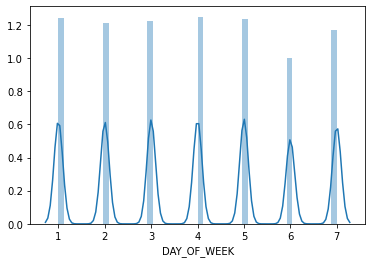

In [12]:
sns.distplot(df_flights['DAY_OF_WEEK'])

In [13]:
stats.spearmanr(df_flights['CANCELLED'],df_flights['MONTH'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.0551329617621633, pvalue=0.0)

In [14]:
stats.pearsonr(df_flights['CANCELLED'],df_flights['MONTH'])

(-0.055043060010336146, 0.0)

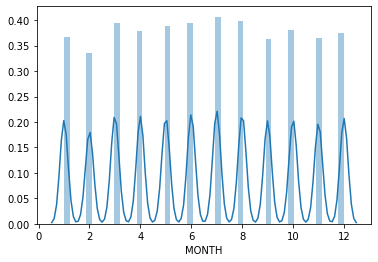

In [15]:
sns.distplot(df_flights['MONTH'])

In [16]:
stats.spearmanr(df_flights['CANCELLED'],df_flights['AIRLINE'], nan_policy = 'omit')

SpearmanrResult(correlation=0.0050961678376882, pvalue=9.822977461217948e-35)

Следующие команды выполняются более часа

##### Пирсона
stats.pearsonr(df_flights['CANCELLED'], df_flights['AIRLINE'])

##### График
sns.barplot(x='CANCELLED', y='AIRLINE', data=df_flights);

#### Origin Airport
to_string = lambda x: str(x)
data1=pd.DataFrame(df_flights['CANCELLED'].apply(to_string),columns=['CANCELLED'])
stats.spearmanr(data1['CANCELLED'],df_flights['ORIGIN_AIRPORT'], nan_policy = 'omit')
stats.pearsonr(data1['CANCELLED'],df_flights['ORIGIN_AIRPORT'])
sns.barplot(x='CANCELLED', y='ORIGIN_AIRPORT', data=df_flights);

## 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [19]:
df_flights[(df_flights['AIRLINE']=='UA') | (df_flights['AIRLINE']=='AA') | (df_flights['AIRLINE']=='US')].groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()

AIRLINE
AA    725984
UA    515723
US    198715
Name: FLIGHT_NUMBER, dtype: int64

In [20]:
df_flights[(df_flights['AIRLINE']=='UA') | (df_flights['AIRLINE']=='AA') | (df_flights['AIRLINE']=='US')].groupby(['AIRLINE'])['CANCELLED'].count()

AIRLINE
AA    725984
UA    515723
US    198715
Name: CANCELLED, dtype: int64

In [21]:
df_flights[(df_flights['AIRLINE']=='UA') | (df_flights['AIRLINE']=='AA') | (df_flights['AIRLINE']=='US')].groupby(['AIRLINE'])['DIVERTED'].count()

AIRLINE
AA    725984
UA    515723
US    198715
Name: DIVERTED, dtype: int64

## 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [22]:
df_flights['FLY_SPEED']=df_flights['DISTANCE'] / df_flights['AIR_TIME']

In [23]:
df_flights.groupby('FLIGHT_NUMBER')['FLY_SPEED'].value_counts()

FLIGHT_NUMBER  FLY_SPEED
1              5.431818     50
               5.690476     40
               5.311111     33
               5.558140     30
               5.829268     30
                            ..
8409           8.266010      1
8410           8.605128      1
8442           7.981481      1
8445           6.682171      1
9320           6.710784      1
Name: FLY_SPEED, Length: 1757239, dtype: int64

In [24]:
df_flights[(df_flights['AIRLINE']=='UA') | (df_flights['AIRLINE']=='AA') | (df_flights['AIRLINE']=='US')].groupby(['AIRLINE'])['FLY_SPEED'].mean()

AIRLINE
AA    7.127989
UA    7.445886
US    6.851808
Name: FLY_SPEED, dtype: float64

## 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [25]:
heat_map_data=df_flights[(df_flights['ORIGIN_AIRPORT']=='ABE') | (df_flights['ORIGIN_AIRPORT']=='ABI')][['FLIGHT_NUMBER', 'DAY']]

In [26]:
hmap=heat_map_data.groupby('FLIGHT_NUMBER')['DAY'].value_counts().reset_index(name='counts')

In [27]:
heatmap1_data = hmap.pivot_table(values='counts',
                                          index='DAY',
                     columns='FLIGHT_NUMBER')

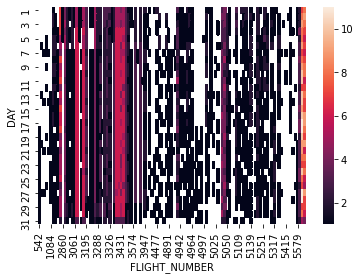

In [28]:
sns.heatmap(heatmap1_data)

## 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [29]:
delay_map=df_flights[(df_flights['ORIGIN_AIRPORT']=='ABE') | (df_flights['ORIGIN_AIRPORT']=='ABI') | (df_flights['ORIGIN_AIRPORT']=='ABQ')][['ORIGIN_AIRPORT','DEPARTURE_DELAY']]

In [30]:
hmap2=delay_map.groupby('DEPARTURE_DELAY')['ORIGIN_AIRPORT'].value_counts().reset_index(name='counts')

In [31]:
heatmap2_data = hmap2.pivot_table(values='counts',
                                          index='ORIGIN_AIRPORT',
                     columns='DEPARTURE_DELAY')

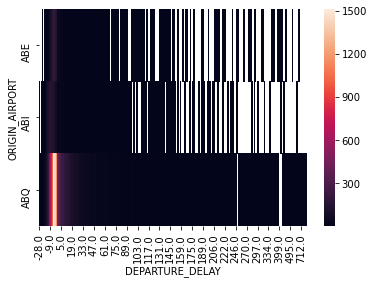

In [32]:
sns.heatmap(heatmap2_data)

In [33]:
delay_map2=df_flights[(df_flights['ORIGIN_AIRPORT']=='ABE') | (df_flights['ORIGIN_AIRPORT']=='ABI') | (df_flights['ORIGIN_AIRPORT']=='ABQ')][['ORIGIN_AIRPORT','ARRIVAL_DELAY']]

In [34]:
hmap3=delay_map2.groupby('ARRIVAL_DELAY')['ORIGIN_AIRPORT'].value_counts().reset_index(name='counts')

In [35]:
heatmap3_data = hmap3.pivot_table(values='counts',
                                          index='ORIGIN_AIRPORT',
                     columns='ARRIVAL_DELAY')

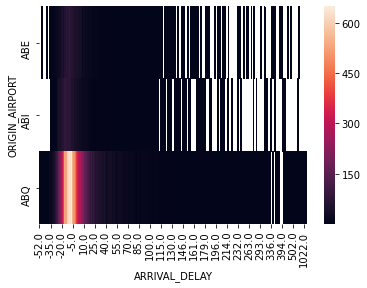

In [36]:
sns.heatmap(heatmap3_data)

## 8. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [37]:
df_flights[(df_flights['DEPARTURE_DELAY'] == df_flights['DEPARTURE_DELAY'].dropna().max()) & (df_flights['ARRIVAL_DELAY'] == df_flights['ARRIVAL_DELAY'].dropna().max())][['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY
337720,AA,1988.0,1971.0
